In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

553
15374


In [5]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
15374
0


In [6]:
#masking
print(len(clusters))
print(len(shapes))

553
15374


# Stats of e1,e2

count    15374.000000
mean        -0.001151
std          0.144523
min         -0.659677
25%         -0.074782
50%         -0.000808
75%          0.073361
max          0.683530
Name: (All, e2), dtype: float64

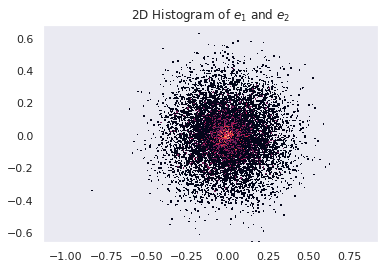

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    15374.000000
mean        -1.052036
std        170.275772
min     -20097.585018
25%         -1.007394
50%         -0.006972
75%          0.987162
max       3224.125134
dtype: float64

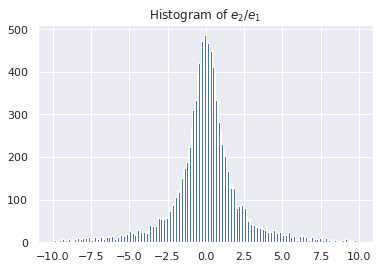

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.491834e+01 
StdE:2.095946e-01 


count    15374.000000
mean        44.918343
std         25.988042
min          0.449819
25%         22.500000
50%         45.387420
75%         68.707657
max         89.812954
Name: (All, phi), dtype: float64

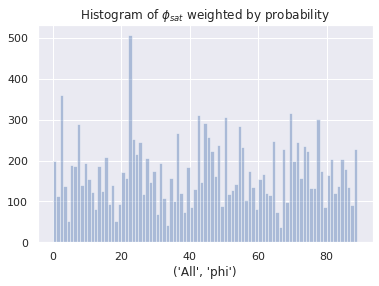

In [12]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [13]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [14]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [15]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

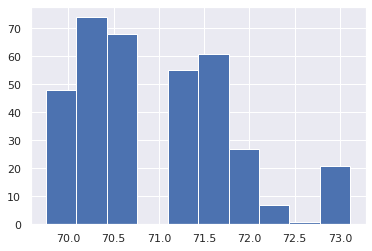

In [16]:
abn_1[('All','RA')].hist()
#RA of objects with ϕ=22.5

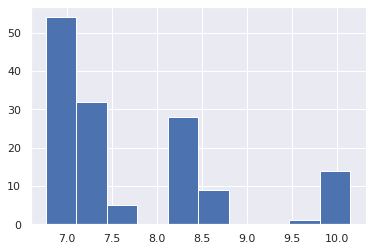

In [17]:
abn_2[('All','RA')].hist()
#RA of objects with ϕ=67.5

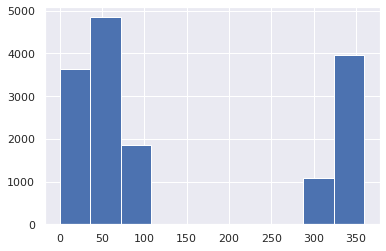

In [18]:
shapes[('All','RA')].hist()
#RA of all objects

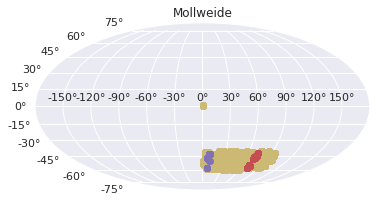

In [19]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [20]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [21]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
print(phi_count[1][sort])
print(phi_count[0][sort])

[22  2 69 42 50 77 44  7 54 36 45 23 64 71 25 48 73 55 88 67 74 46 24 15
 27 84 81  0 70 31  9  5 13  6 39 85 57 78 29 20 61 80 47 34 21 72 60 10
 28 43 53 17  8 83  3 86 58 76 75 41 52 14 11 37 82 62 26 51 63  1 32 56
 35 68 16 19 87 49 40 79 59 12 38 65 30  4 18 33 66]
[507 360 317 312 307 303 291 290 285 267 259 254 248 245 245 238 235 233
 229 228 224 223 216 209 207 205 203 200 198 194 193 189 188 187 184 180
 175 175 174 171 167 165 162 158 158 157 156 154 148 147 142 141 140 137
 137 136 136 134 134 130 128 125 124 121 121 121 119 119 117 113 108 103
 102  99  93  93  91  90  86  86  81  81  75  75  70  52  52  43  38]


count    507.000000
mean      22.480421
std        0.140735
min       22.001433
25%       22.425069
50%       22.500000
75%       22.500000
max       22.939428
Name: (All, phi), dtype: float64

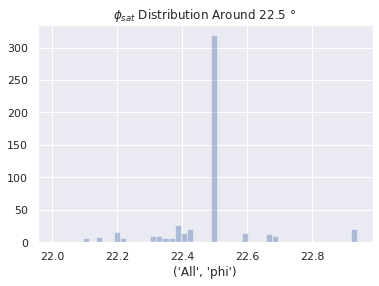

In [22]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    507.000000
mean      68.391897
std        0.867910
min       67.090249
25%       67.500000
50%       68.201627
75%       69.285244
max       69.741630
Name: (All, phi), dtype: float64

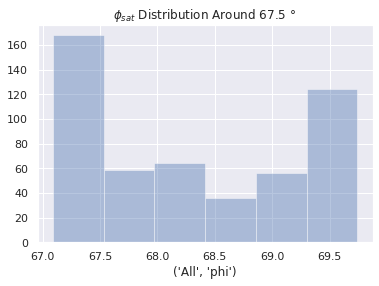

In [23]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

# Get e

## Statistics of e1 and e2

In [24]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    15374.000000
mean         0.000431
std          0.142445
min         -0.838272
25%         -0.073935
50%         -0.000909
75%          0.074437
max          0.629636
Name: (All, e1), dtype: float64

In [25]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    15374.000000
mean        -0.001151
std          0.144523
min         -0.659677
25%         -0.074782
50%         -0.000808
75%          0.073361
max          0.683530
Name: (All, e2), dtype: float64

In [26]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [27]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-1.016924e-03, std_mean=1.162651e-03


count    15374.000000
mean        -0.001017
std          0.144159
min         -0.641451
25%         -0.076386
50%         -0.000137
75%          0.073117
max          0.684332
Name: (All, ep), dtype: float64

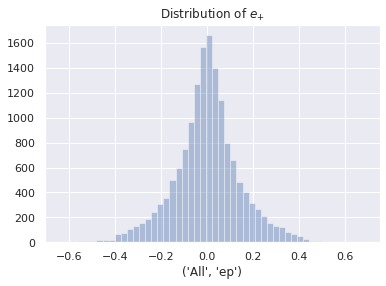

In [28]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=5.403571e-04, std_mean=1.151797e-03


count    15374.000000
mean         0.000540
std          0.142814
min         -0.636614
25%         -0.071348
50%          0.004076
75%          0.073154
max          0.663913
Name: (All, ex), dtype: float64

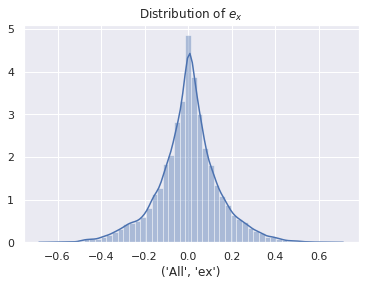

In [29]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()